In [300]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [301]:
data = pd.read_csv(r'C:\Users\nbwan\Python\Data Science\cpiffr.csv')
data['DATE'] = pd.to_datetime(data['DATE'])
data

,DATE,FEDFUNDS,MEDCPIM158SFRBCLE,UMCSENT
0,2005-01-01,2.28,3.421759,95.5
1,2005-02-01,2.50,3.304002,94.1
2,2005-03-01,2.63,1.897179,92.6
3,2005-04-01,2.79,2.096479,87.7
4,2005-05-01,3.00,3.168462,86.9
...,...,...,...,...
228,2024-01-01,5.33,6.542477,79
229,2024-02-01,5.33,4.558160,76.9
230,2024-03-01,5.33,4.327346,79.4
231,2024-04-01,5.33,4.251323,77.2


In [302]:
new = pd.read_csv(r'C:\Users\nbwan\Python\Data Science\yes.csv')
new['date'] = pd.to_datetime(new['date'])

new

,date,FEDFUNDS,MEDCPIM158SFRBCLE,UMCSENT
0,2005-01-01,NaN,NaN,NaN
1,2005-01-03,NaN,NaN,NaN
2,2005-01-04,NaN,NaN,NaN
3,2005-01-05,NaN,NaN,NaN
4,2005-01-06,NaN,NaN,NaN
...,...,...,...,...
5079,2024-06-20,NaN,NaN,NaN
5080,2024-06-21,NaN,NaN,NaN
5081,2024-06-24,NaN,NaN,NaN
5082,2024-06-25,NaN,NaN,NaN


In [303]:
data['YearMonth'] = data['DATE'].dt.to_period('M')
new['YearMonth'] = new['date'].dt.to_period('M')

In [304]:
result = pd.merge(new, data[['YearMonth', 'FEDFUNDS', 'MEDCPIM158SFRBCLE', 'UMCSENT']], on='YearMonth', how='left')
result = result.drop(columns=['YearMonth'])


result = result.drop(columns=['FEDFUNDS_x'])
result = result.drop(columns=['MEDCPIM158SFRBCLE_x'])
result = result.drop(columns=['UMCSENT_x'])

result = result.dropna()

result = result[~((result['date'].dt.year == 2024) & (result['date'].dt.month == 5))]


result

,date,FEDFUNDS_y,MEDCPIM158SFRBCLE_y,UMCSENT_y
0,2005-01-01,2.28,3.421759,95.5
1,2005-01-03,2.28,3.421759,95.5
2,2005-01-04,2.28,3.421759,95.5
3,2005-01-05,2.28,3.421759,95.5
4,2005-01-06,2.28,3.421759,95.5
...,...,...,...,...
5038,2024-04-24,5.33,4.251323,77.2
5039,2024-04-25,5.33,4.251323,77.2
5040,2024-04-26,5.33,4.251323,77.2
5041,2024-04-29,5.33,4.251323,77.2


In [305]:

import datetime as dt
from pandas_datareader import data as pdr


start = dt.datetime(2003,1,1)
end = dt.datetime(2024,4,30)

yf.pdr_override()


stock_symbol = input("Enter the stock ticker symbol (e.g., NVDA): ").strip().upper()

stock = pdr.get_data_yahoo(stock_symbol, start, end)
stock.index = pd.to_datetime(stock.index)
stock

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-01-02,9.50,9.95,9.47,9.94,4.927460,10137600
2003-01-03,9.88,9.97,9.67,9.68,4.798573,8436000
2003-01-06,9.70,10.15,9.68,10.07,4.991901,11028600
2003-01-07,10.07,10.25,9.95,10.13,5.021647,8406900
2003-01-08,10.13,10.20,9.94,10.01,4.962161,9246600
...,...,...,...,...,...,...
2024-04-23,13.05,13.05,12.82,12.94,12.784719,62807100
2024-04-24,12.94,13.05,12.78,12.95,12.794600,74510400
2024-04-25,12.85,13.18,12.63,13.04,12.883519,86944100


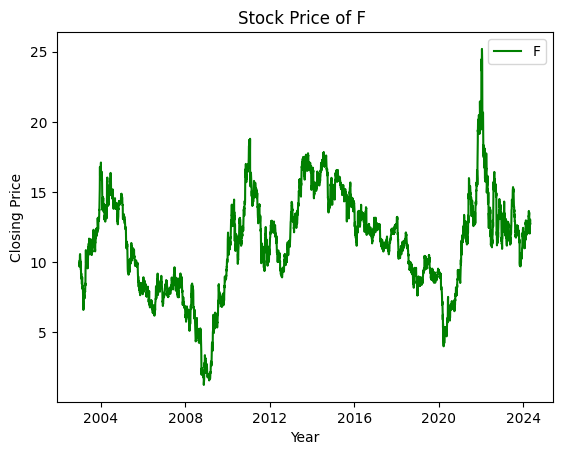

In [306]:
fig, ax = plt.subplots()
ax.plot(stock.index, stock['Close'], label=f'{stock_symbol}', color = 'green')
ax.set_xlabel('Year')
ax.set_ylabel('Closing Price')
ax.set_title(f'Stock Price of {stock_symbol} ')
ax.legend()

In [307]:
df = stock

df['50_CloseMA'] = df['Close'].rolling(window=50).mean()

df['365_CloseMA'] = df['Close'].rolling(window=365).mean()

df['50_VolMA'] = df['Volume'].rolling(window=50).mean()

df['365_VolMA'] = df['Volume'].rolling(window=365).mean()


In [308]:
def calculate_rsi(data, period=14):
  
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df['Close'])


In [309]:
df = df.sort_values(by=['Date'], ascending=True)

df = df.loc['2005-01-01':"2024-04-30"]

df

,Open,High,Low,Close,Adj Close,Volume,50_CloseMA,365_CloseMA,50_VolMA,365_VolMA,RSI
Date,,,,,,,,,,,
2005-01-03,14.66,14.75,14.51,14.71,7.778262,9852200,14.0888,13.744740,7378010.0,9.793422e+06,66.438373
2005-01-04,14.71,14.75,14.59,14.66,7.751822,9035400,14.1226,13.755644,7416580.0,9.799036e+06,61.971836
2005-01-05,14.63,14.66,14.42,14.43,7.630207,11376200,14.1572,13.765123,7411286.0,9.812044e+06,54.320999
2005-01-06,14.40,14.52,14.37,14.45,7.640779,6672600,14.1892,13.774986,7296140.0,9.808869e+06,57.324828
2005-01-07,14.48,14.65,14.45,14.65,7.746536,11452500,14.2194,13.785452,7314648.0,9.810013e+06,59.393925
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23,13.05,13.05,12.82,12.94,12.784719,62807100,12.5898,12.394274,49513280.0,5.634082e+07,38.801258
2024-04-24,12.94,13.05,12.78,12.95,12.794600,74510400,12.5892,12.392164,49922758.0,5.640049e+07,45.255470
2024-04-25,12.85,13.18,12.63,13.04,12.883519,86944100,12.5964,12.391425,50303486.0,5.643541e+07,45.652178


In [310]:
df = pd.merge(df, result, left_on='Date', right_on='date')

df.set_index('date', inplace=True)

df

,Open,High,Low,Close,Adj Close,Volume,50_CloseMA,365_CloseMA,50_VolMA,365_VolMA,RSI,FEDFUNDS_y,MEDCPIM158SFRBCLE_y,UMCSENT_y
date,,,,,,,,,,,,,,
2005-01-03,14.66,14.75,14.51,14.71,7.778262,9852200,14.0888,13.744740,7378010.0,9.793422e+06,66.438373,2.28,3.421759,95.5
2005-01-04,14.71,14.75,14.59,14.66,7.751822,9035400,14.1226,13.755644,7416580.0,9.799036e+06,61.971836,2.28,3.421759,95.5
2005-01-05,14.63,14.66,14.42,14.43,7.630207,11376200,14.1572,13.765123,7411286.0,9.812044e+06,54.320999,2.28,3.421759,95.5
2005-01-06,14.40,14.52,14.37,14.45,7.640779,6672600,14.1892,13.774986,7296140.0,9.808869e+06,57.324828,2.28,3.421759,95.5
2005-01-07,14.48,14.65,14.45,14.65,7.746536,11452500,14.2194,13.785452,7314648.0,9.810013e+06,59.393925,2.28,3.421759,95.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23,13.05,13.05,12.82,12.94,12.784719,62807100,12.5898,12.394274,49513280.0,5.634082e+07,38.801258,5.33,4.251323,77.2
2024-04-24,12.94,13.05,12.78,12.95,12.794600,74510400,12.5892,12.392164,49922758.0,5.640049e+07,45.255470,5.33,4.251323,77.2
2024-04-25,12.85,13.18,12.63,13.04,12.883519,86944100,12.5964,12.391425,50303486.0,5.643541e+07,45.652178,5.33,4.251323,77.2


In [311]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X = df.drop("Close", axis=1)
y = df['Close']


In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [313]:
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4.594266871624096


In [314]:
y_pred = knn.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

               Actual  Predicted
date                            
2013-09-10  17.549999     13.556
2018-04-27  11.490000     10.160
2015-07-16  14.570000     14.972
2013-05-14  14.270000     12.988
2017-02-27  12.660000     12.324


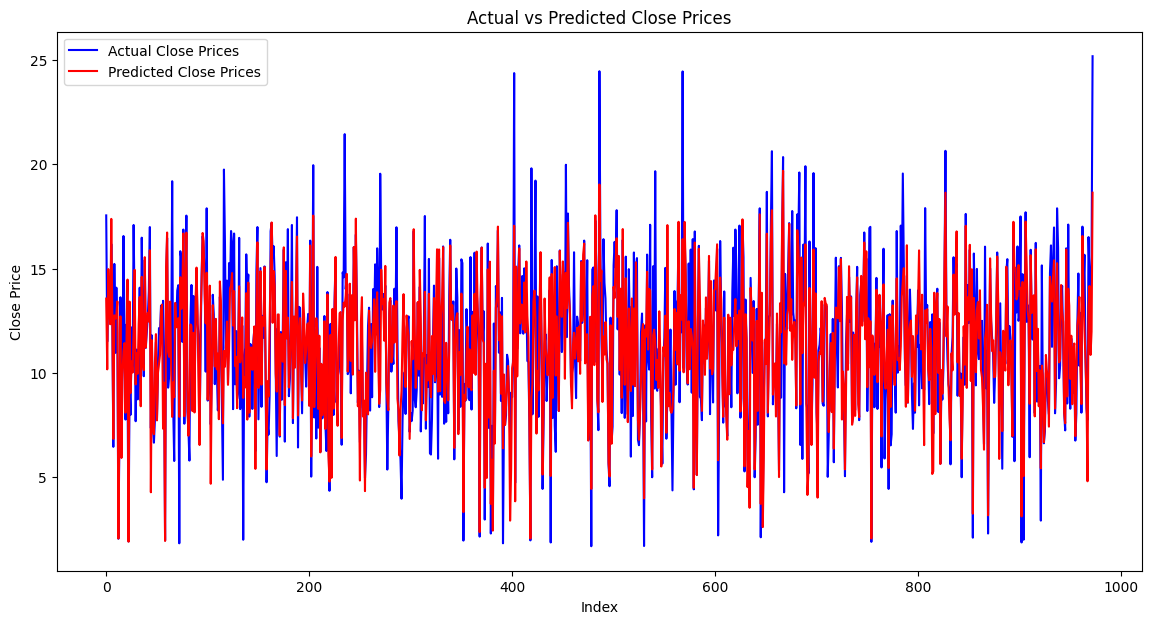

In [315]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(results['Actual'].values, label='Actual Close Prices', color='blue')
plt.plot(results['Predicted'].values, label='Predicted Close Prices', color='red')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()



In [316]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 4.594266871624096
Mean Absolute Error (MAE): 1.420092492235895
R-squared (R2): 0.6684433888659029
